In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df = pd.read_csv('car_data.csv')

In [249]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [250]:
df.shape

(1000, 5)

In [251]:
# df.shape
df['User ID'].nunique()

1000

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [253]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [254]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [255]:
df.corr()

,User ID,Age,AnnualSalary,Purchased
User ID,1.000000,0.017647,0.006541,0.015911
Age,0.017647,1.000000,0.166042,0.616036
AnnualSalary,0.006541,0.166042,1.000000,0.364974
Purchased,0.015911,0.616036,0.364974,1.000000


<AxesSubplot:>

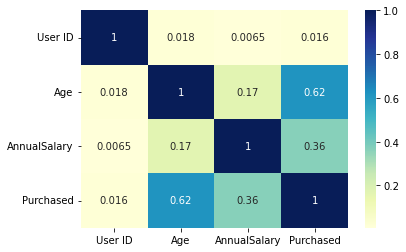

In [256]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:>

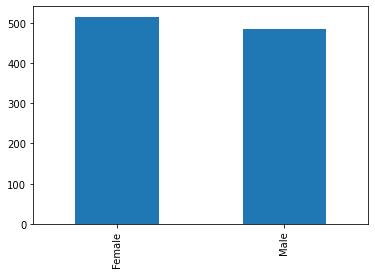

In [257]:
df['Gender'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frequency of Purchase')

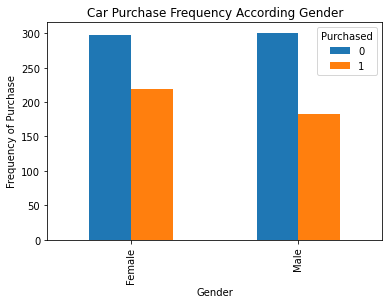

In [258]:
%matplotlib inline
pd.crosstab(df.Gender,df.Purchased).plot(kind='bar')
plt.title('Car Purchase Frequency According Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Car Puchasing Frequency')

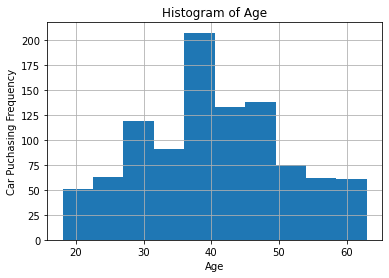

In [259]:
df.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Car Puchasing Frequency')

In [260]:
df.sample()

,User ID,Gender,Age,AnnualSalary,Purchased
832,218,Female,27,54000,0


In [261]:
df['Gender'].replace(['Male','Female'],[0,1],inplace = True)

In [262]:
df.sample()

,User ID,Gender,Age,AnnualSalary,Purchased
654,654,0,22,73500,0


In [263]:
X = df.iloc[:,1:4]
X.sample()

,Gender,Age,AnnualSalary
901,0,39,35500


In [264]:
y = df.iloc[:,-1:]

In [265]:
y.sample()

,Purchased
146,0


In [266]:
from sklearn.model_selection import train_test_split

In [267]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [268]:
X_train.shape

(700, 3)

In [269]:
X_test.shape

(300, 3)

In [270]:
y_train.shape

(700, 1)

In [271]:
y_test.shape

(300, 1)

In [272]:
from sklearn.preprocessing import StandardScaler

In [273]:
ss = StandardScaler()

In [274]:
ss.fit(X_train)

StandardScaler()

In [275]:
X_train.head()

,Gender,Age,AnnualSalary
105,1,51,21500
68,0,41,45000
479,1,34,114500
399,0,45,151500
434,0,41,66500


In [276]:
x_train = ss.transform(X_train)
x_test = ss.transform(X_test)

In [277]:
x_train

array([[ 0.98019606,  0.99142304, -1.47432242],
       [-1.02020406,  0.05015608, -0.7980183 ],
       [ 0.98019606, -0.60873079,  1.20211515],
       ...,
       [-1.02020406,  1.93269   ,  0.33874819],
       [ 0.98019606, -0.98523757, -0.30877703],
       [ 0.98019606, -2.02063123, -0.78362885]])

In [278]:
x_train

array([[ 0.98019606,  0.99142304, -1.47432242],
       [-1.02020406,  0.05015608, -0.7980183 ],
       [ 0.98019606, -0.60873079,  1.20211515],
       ...,
       [-1.02020406,  1.93269   ,  0.33874819],
       [ 0.98019606, -0.98523757, -0.30877703],
       [ 0.98019606, -2.02063123, -0.78362885]])

In [279]:
x_train = pd.DataFrame(x_train,columns = X_train.columns)
x_test = pd.DataFrame(x_test,columns = X_test.columns)

In [280]:
x_train.sample()

,Gender,Age,AnnualSalary
654,-1.020204,0.709043,-1.071418


In [281]:
x_test.sample()

,Gender,Age,AnnualSalary
73,-1.020204,-1.173491,-0.380724


In [282]:
from sklearn.linear_model import LogisticRegression

In [283]:
lr = LogisticRegression()

In [284]:
lr.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [285]:
predict = lr.predict(x_test)

In [286]:
predict

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], d

In [287]:
from sklearn.metrics import accuracy_score

In [288]:
accuracy = accuracy_score(y_test,predict)

In [289]:
accuracy

0.8333333333333334